# SVM案例
- 线性核函数
- 多项式核函数
- 高斯核函数

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class1 = np.array([[1, 1], [1, 3], [2, 1], [1, 2], [2, 2]])
class2 = np.array([[4, 4], [5, 5], [5, 4], [5, 3], [4, 5], [6, 4]])

## 1.支持向量机原理

Text(0.5, 1.5, 'support vector')

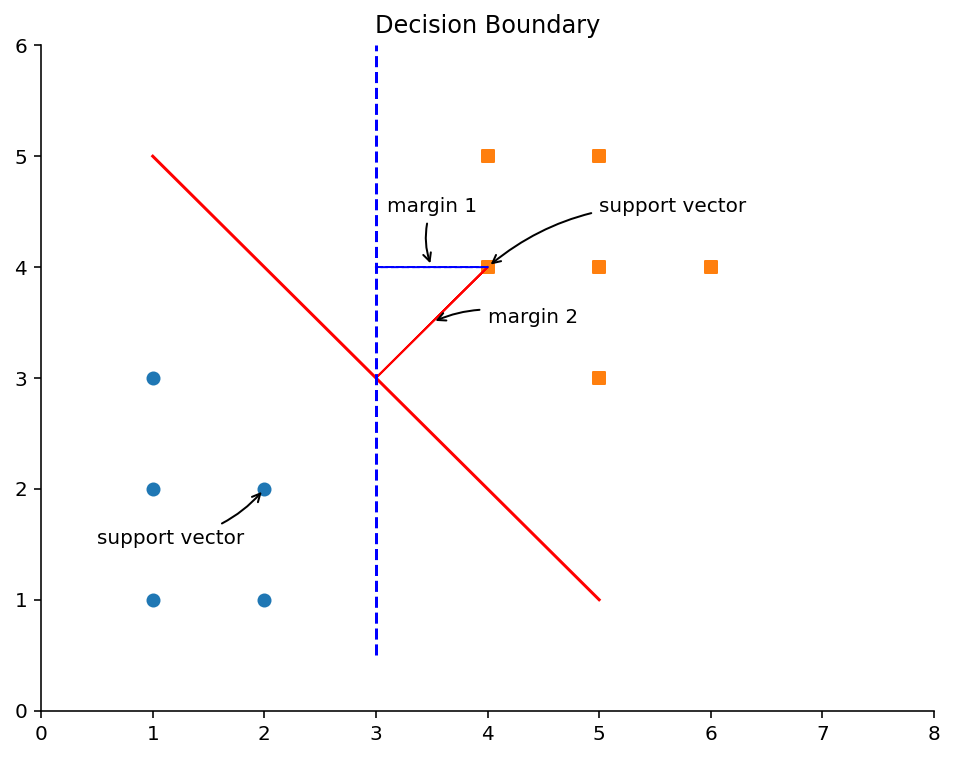

In [3]:
plt.figure(figsize=(8, 6), dpi=144)

plt.title('Decision Boundary')

plt.xlim(0, 8)
plt.ylim(0, 6)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.scatter(class1[:, 0], class1[:, 1], marker='o')
plt.scatter(class2[:, 0], class2[:, 1], marker='s')
plt.plot([1, 5], [5, 1], '-r')
plt.arrow(4, 4, -1, -1, shape='full', color='r')
plt.plot([3, 3], [0.5, 6], '--b')
plt.arrow(4, 4, -1, 0, shape='full', color='b', linestyle='--')
plt.annotate(r'margin 1',
             xy=(3.5, 4), xycoords='data',
             xytext=(3.1, 4.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'margin 2',
             xy=(3.5, 3.5), xycoords='data',
             xytext=(4, 3.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'support vector',
             xy=(4, 4), xycoords='data',
             xytext=(5, 4.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'support vector',
             xy=(2, 2), xycoords='data',
             xytext=(0.5, 1.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

## 2. 类别划分的公式表示

Text(5, 4.5, 'A')

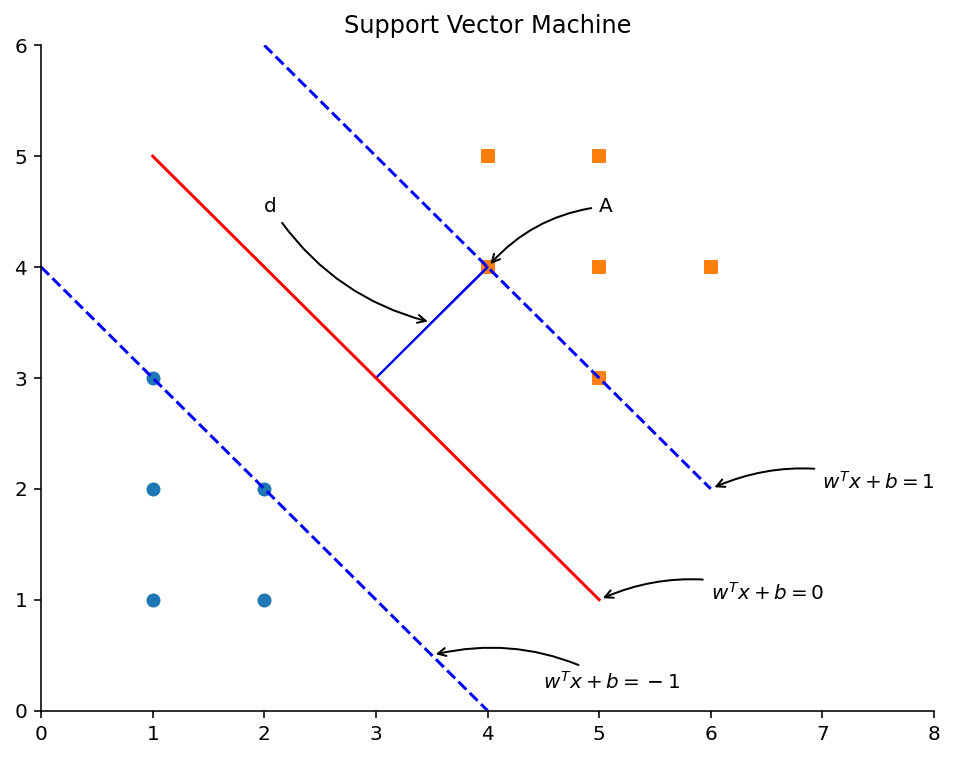

In [4]:
plt.figure(figsize=(8, 6), dpi=144)

plt.title('Support Vector Machine')

plt.xlim(0, 8)
plt.ylim(0, 6)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.scatter(class1[:, 0], class1[:, 1], marker='o')
plt.scatter(class2[:, 0], class2[:, 1], marker='s')
plt.plot([1, 5], [5, 1], '-r')
plt.plot([0, 4], [4, 0], '--b', [2, 6], [6, 2], '--b')
plt.arrow(4, 4, -1, -1, shape='full', color='b')
plt.annotate(r'$w^T x + b = 0$',
             xy=(5, 1), xycoords='data',
             xytext=(6, 1), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'$w^T x + b = 1$',
             xy=(6, 2), xycoords='data',
             xytext=(7, 2), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'$w^T x + b = -1$',
             xy=(3.5, 0.5), xycoords='data',
             xytext=(4.5, 0.2), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'd',
             xy=(3.5, 3.5), xycoords='data',
             xytext=(2, 4.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'A',
             xy=(4, 4), xycoords='data',
             xytext=(5, 4.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

## 3.松弛系数-解决线性不可分问题

Text(3, 1.5, '$\\epsilon > 0$')

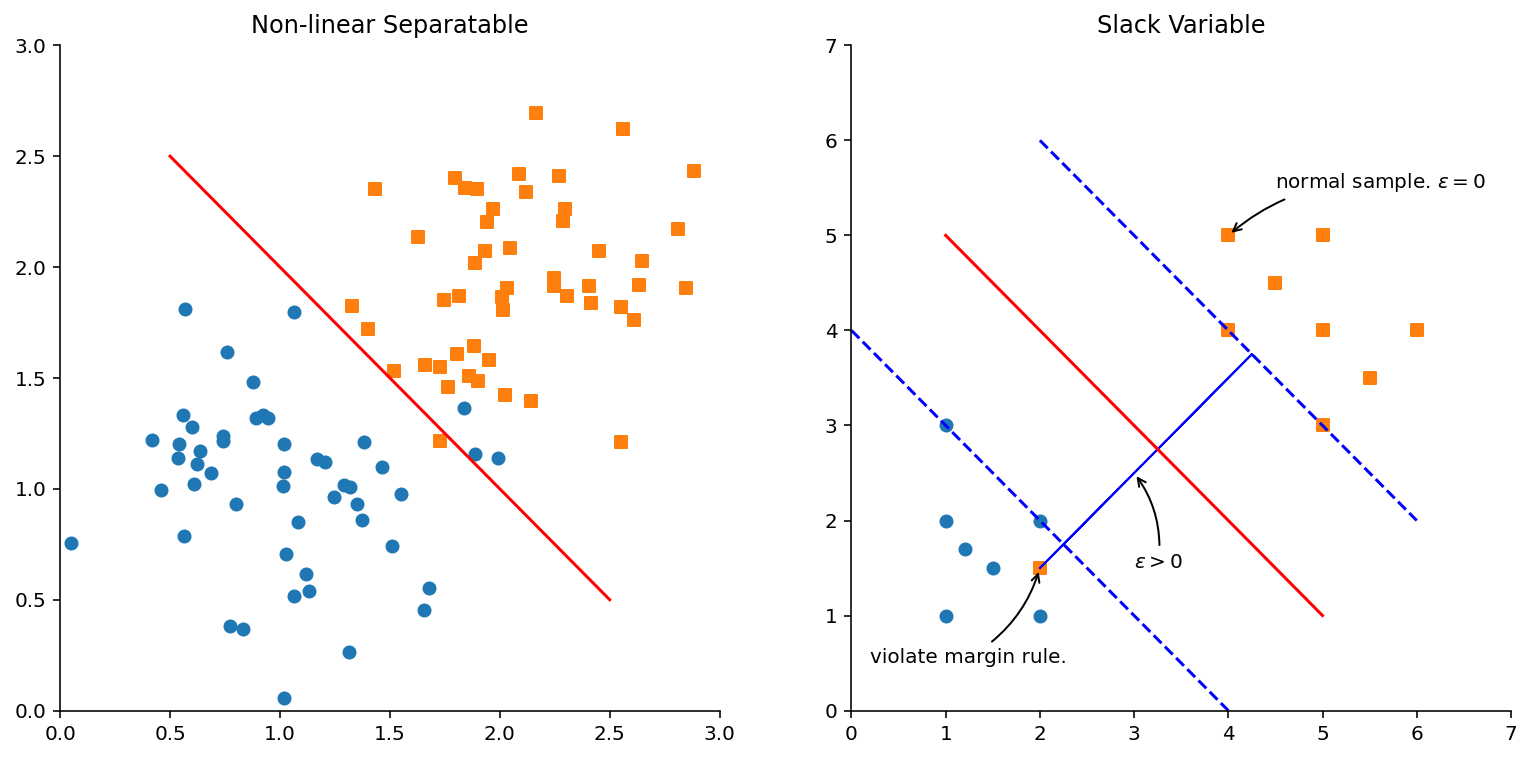

In [5]:
from sklearn.datasets import make_blobs

plt.figure(figsize=(13, 6), dpi=144)

# sub plot 1
plt.subplot(1, 2, 1)

X, y = make_blobs(n_samples=100, 
                  n_features=2, 
                  centers=[(1, 1), (2, 2)], 
                  random_state=4, 
                  shuffle=False,
                  cluster_std=0.4)

plt.title('Non-linear Separatable')

plt.xlim(0, 3)
plt.ylim(0, 3)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.scatter(X[y==0][:, 0], X[y==0][:, 1], marker='o')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], marker='s')
plt.plot([0.5, 2.5], [2.5, 0.5], '-r')

# sub plot 2
plt.subplot(1, 2, 2)

class1 = np.array([[1, 1], [1, 3], [2, 1], [1, 2], [2, 2], [1.5, 1.5], [1.2, 1.7]])
class2 = np.array([[4, 4], [5, 5], [5, 4], [5, 3], [4, 5], [6, 4], [5.5, 3.5], [4.5, 4.5], [2, 1.5]])

plt.title('Slack Variable')

plt.xlim(0, 7)
plt.ylim(0, 7)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.scatter(class1[:, 0], class1[:, 1], marker='o')
plt.scatter(class2[:, 0], class2[:, 1], marker='s')
plt.plot([1, 5], [5, 1], '-r')
plt.plot([0, 4], [4, 0], '--b', [2, 6], [6, 2], '--b')
plt.arrow(2, 1.5, 2.25, 2.25, shape='full', color='b')
plt.annotate(r'violate margin rule.',
             xy=(2, 1.5), xycoords='data',
             xytext=(0.2, 0.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'normal sample. $\epsilon = 0$',
             xy=(4, 5), xycoords='data',
             xytext=(4.5, 5.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'$\epsilon > 0$',
             xy=(3, 2.5), xycoords='data',
             xytext=(3, 1.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

   支持向量机（SVM）中的松弛变量（slack variable）是用来处理非线性可分数据集的一种机制。在理想情况下，SVM能够找到一条直线（或在更高维空间中的超平面），将不同类别的数据点完全分开。然而，在现实世界中，很多数据集并不是线性可分的，即不存在一条直线能够完美地将所有不同类别的数据点分开。

   在这种情况下，SVM引入了松弛变量（通常表示为ξ）来允许一些数据点违反边界规则，即它们可以位于错误的一侧。这样做的目的是为了在最大化边界（即找到尽可能宽的间隔）和最小化分类错误之间找到一个平衡。具体来说，松弛变量的作用包括：
   
   1.容错：允许模型对某些数据点进行误分类，这对于处理噪声和异常值特别有用。
    
   2.软间隔：通过引入松弛变量，SVM从寻找硬间隔（hard margin，即没有误分类）转变为寻找软间隔（soft margin，即允许一些误分类）。这使得SVM更加灵活，能够处理非线性可分的数据集。
   
   3.正则化：松弛变量与正则化参数C一起工作，C控制着误分类的惩罚程度。较大的C值意味着模型将尝试最小化误分类，而较小的C值则允许更多的误分类，以获得更好的泛化能力。
    
   4.优化问题：在SVM的优化问题中，松弛变量使得问题从不可解（对于非线性可分的数据集）转变为可解。优化问题的目标是最大化间隔的同时，最小化违反间隔的数据点数量（通过松弛变量控制）。
    
   5.提高泛化能力：通过允许一些误分类，SVM可以避免过拟合，从而提高模型在未知数据上的泛化能力。

   总之，松弛变量是SVM处理非线性可分数据集的关键机制，它通过引入一些误分类来提高模型的灵活性和泛化能力。

## 4.高斯核函数
- 可以把特征向量转换到无限多维向量空间里
- 函数的形状为倒钟形，sigma控制钟的开口宽度

高斯核函数，也称为径向基函数（Radial Basis Function, RBF），是一种在机器学习和统计学中常用的核函数，特别是在支持向量机（SVM）和神经网络中。高斯核函数的数学表达式为：

$$
K(x, y) = \exp\left(-\frac{\|x - y\|^2}{2\sigma^2}\right)
$$

其中：

- x 和 y 是输入向量。
- ∥x−y∥∥x−y∥ 表示 x 和 y 之间的欧几里得距离。
- σ 是一个正的常数，称为带宽参数，它控制着函数的宽度，即影响函数值随距离增加而减少的速度。

关键：参数选择，带宽参数 σ 的选择对核函数的影响很大。较大的 σ 会导致核函数值随距离的增加而缓慢减少，使得模型更加平滑；较小的 σ 则会使核函数值随距离的增加而快速减少，导致模型更加敏感于输入数据的小变化。

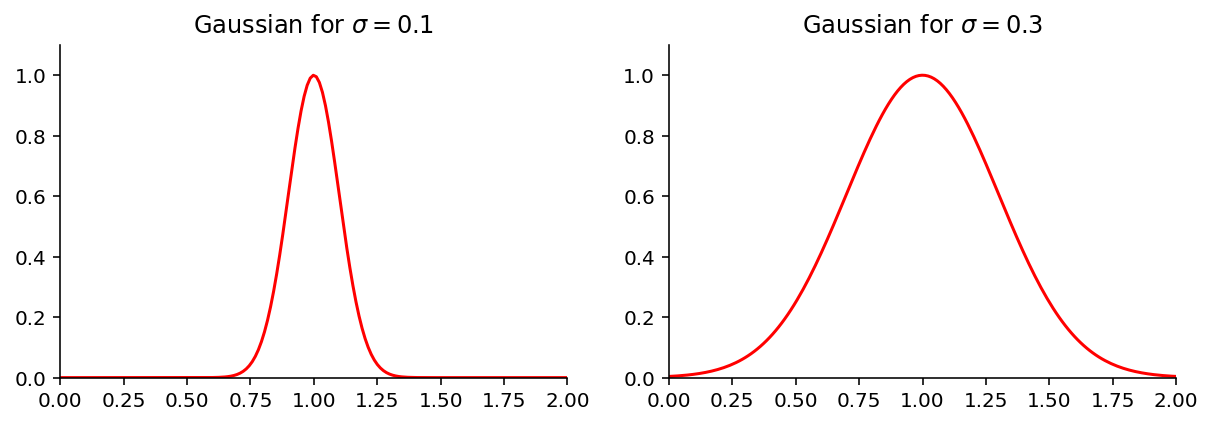

In [6]:
def gaussian_kernel(x, mean, sigma):
    return np.exp(- (x - mean)**2 / (2 * sigma**2))

x = np.linspace(0, 6, 500)
mean = 1
sigma1 = 0.1
sigma2 = 0.3

plt.figure(figsize=(10, 3), dpi=144)

# sub plot 1
plt.subplot(1, 2, 1)
plt.title('Gaussian for $\sigma={0}$'.format(sigma1))

plt.xlim(0, 2)
plt.ylim(0, 1.1)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.plot(x, gaussian_kernel(x, mean, sigma1), 'r-')

# sub plot 2
plt.subplot(1, 2, 2)
plt.title('Gaussian for $\sigma={0}$'.format(sigma2))

plt.xlim(0, 2)
plt.ylim(0, 1.1)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.plot(x, gaussian_kernel(x, mean, sigma2), 'r-')